In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pywt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/14-celebrity-faces-dataset/14-celebrity-faces-dataset.zip
/kaggle/input/14-celebrity-faces-dataset/14-celebrity-faces-dataset/14-celebrity-faces-dataset/photo_credits.txt
/kaggle/input/14-celebrity-faces-dataset/14-celebrity-faces-dataset/14-celebrity-faces-dataset/data/val/arnold_schwarzenegger/359px-Arnold_Schwarzenegger_2003.jpg
/kaggle/input/14-celebrity-faces-dataset/14-celebrity-faces-dataset/14-celebrity-faces-dataset/data/val/arnold_schwarzenegger/800px-Arnold_Schwarzenegger_(33730957348).jpg
/kaggle/input/14-celebrity-faces-dataset/14-celebrity-faces-dataset/14-celebrity-faces-dataset/data/val/arnold_schwarzenegger/Terry_Everett_with_Arnold_Schwarzenegger.jpg
/kaggle/input/14-celebrity-faces-dataset/14-celebrity-faces-dataset/14-celebrity-faces-dataset/data/val/arnold_schwarzenegger/379px-Arnold_Schwarzenegger_-_2019_(33730956438)_(cropped).jpg
/kaggle/input/14-celebrity-faces-dataset/14-celebrity-faces-dataset/14-celebrity-faces-dataset/data/val/arnold_schwarzen

In [2]:
pip show seaborn

Name: seaborn
Version: 0.11.2
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@gmail.com
License: BSD (3-clause)
Location: /opt/conda/lib/python3.7/site-packages
Requires: matplotlib, numpy, pandas, scipy
Required-by: geoplot, hypertools, missingno, pandas-profiling, segregation, splot, spvcm
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip show PyWavelets

Name: PyWavelets
Version: 1.3.0
Summary: PyWavelets, wavelet transform module
Home-page: https://github.com/PyWavelets/pywt
Author: 
Author-email: 
License: MIT
Location: /opt/conda/lib/python3.7/site-packages
Requires: numpy
Required-by: ImageHash, scikit-image
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip show opencv-python

Name: opencv-python
Version: 4.5.4.60
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/skvark/opencv-python
Author: 
Author-email: 
License: MIT
Location: /opt/conda/lib/python3.7/site-packages
Requires: numpy
Required-by: gluoncv, imgaug
Note: you may need to restart the kernel to use updated packages.


In [5]:
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
img = cv2.imread('/kaggle/input/14-celebrity-faces-dataset/14-celebrity-faces-dataset/14-celebrity-faces-dataset/data/train/anne_hathaway/476px-Anne_Hathaway_(cropped)_(cropped).png')
img.shape

(600, 476, 3)

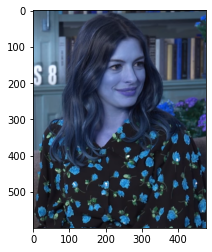

In [7]:
plt.imshow(img)

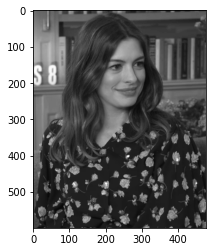

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [9]:
cv2_base_dir = os.path.dirname(os.path.abspath(cv2.__file__))
haar_model = os.path.join(cv2_base_dir, 'data/haarcascade_frontalface_default.xml')

facecascade = cv2.CascadeClassifier(haar_model)
faces = facecascade.detectMultiScale(gray, 1.3, 5)
faces

array([[178,  94, 159, 159]], dtype=int32)

In [10]:
(x,y,w,h) = faces[0]
x,y,w,h

(178, 94, 159, 159)

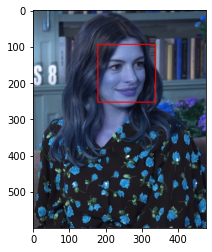

In [11]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

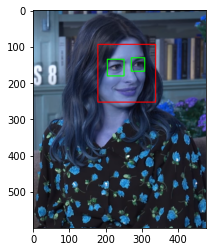

In [12]:
eye_cascade= cv2.CascadeClassifier(os.path.join(cv2_base_dir, 'data/haarcascade_eye.xml'))
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
roi_gray = gray[y:y+h, x:x+w]
roi_color = face_img[y:y+h, x:x+w]
eyes = eye_cascade.detectMultiScale(roi_gray)
for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

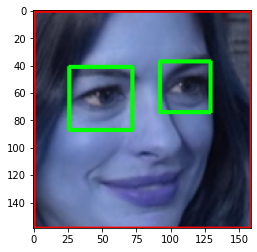

In [13]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [14]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = facecascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

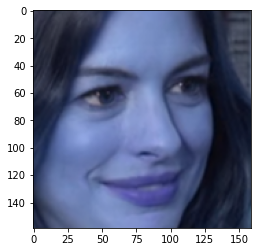

In [15]:
cropped_image = get_cropped_image_if_2_eyes('/kaggle/input/14-celebrity-faces-dataset/14-celebrity-faces-dataset/14-celebrity-faces-dataset/data/train/anne_hathaway/476px-Anne_Hathaway_(cropped)_(cropped).png')
plt.imshow(cropped_image)

In [16]:
cropped_image = np.array(roi_color)
cropped_image.shape

(159, 159, 3)

In [17]:
path_to_data = '/kaggle/input/14-celebrity-faces-dataset/14-celebrity-faces-dataset/14-celebrity-faces-dataset/data/train/'
path_to_cr_data = '/kaggle/working/cropped/'

In [18]:
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [19]:
img_dirs

['/kaggle/input/14-celebrity-faces-dataset/14-celebrity-faces-dataset/14-celebrity-faces-dataset/data/train/arnold_schwarzenegger',
 '/kaggle/input/14-celebrity-faces-dataset/14-celebrity-faces-dataset/14-celebrity-faces-dataset/data/train/ben_afflek',
 '/kaggle/input/14-celebrity-faces-dataset/14-celebrity-faces-dataset/14-celebrity-faces-dataset/data/train/will_smith',
 '/kaggle/input/14-celebrity-faces-dataset/14-celebrity-faces-dataset/14-celebrity-faces-dataset/data/train/lauren_cohan',
 '/kaggle/input/14-celebrity-faces-dataset/14-celebrity-faces-dataset/14-celebrity-faces-dataset/data/train/simon_pegg',
 '/kaggle/input/14-celebrity-faces-dataset/14-celebrity-faces-dataset/14-celebrity-faces-dataset/data/train/keanu_reeves',
 '/kaggle/input/14-celebrity-faces-dataset/14-celebrity-faces-dataset/14-celebrity-faces-dataset/data/train/mindy_kaling',
 '/kaggle/input/14-celebrity-faces-dataset/14-celebrity-faces-dataset/14-celebrity-faces-dataset/data/train/dwayne_johnson',
 '/kaggle/i

In [20]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [21]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count =1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            roi_color = np.array(roi_color)
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder:", cropped_folder)
            
            cropped_file_name = celebrity_name + str(count) + '.png'
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count+=1

arnold_schwarzenegger
Generating cropped images in folder: /kaggle/working/cropped/arnold_schwarzenegger
ben_afflek
Generating cropped images in folder: /kaggle/working/cropped/ben_afflek
will_smith
Generating cropped images in folder: /kaggle/working/cropped/will_smith
lauren_cohan
Generating cropped images in folder: /kaggle/working/cropped/lauren_cohan
simon_pegg
Generating cropped images in folder: /kaggle/working/cropped/simon_pegg
keanu_reeves
Generating cropped images in folder: /kaggle/working/cropped/keanu_reeves
mindy_kaling
Generating cropped images in folder: /kaggle/working/cropped/mindy_kaling
dwayne_johnson
Generating cropped images in folder: /kaggle/working/cropped/dwayne_johnson
sofia_vergara
Generating cropped images in folder: /kaggle/working/cropped/sofia_vergara
jerry_seinfeld
Generating cropped images in folder: /kaggle/working/cropped/jerry_seinfeld
anne_hathaway
Generating cropped images in folder: /kaggle/working/cropped/anne_hathaway
kate_beckinsale
Generatin

In [22]:
def w2d(img, mode='haar', level=1):
    imArray = img
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    imArray =  np.float32(imArray)   
    imArray /= 255;
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

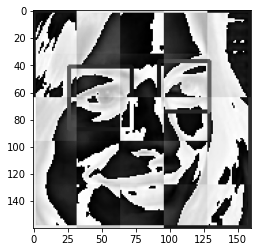

In [23]:
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap = 'gray')

In [24]:
celebrity_file_names_dict

{'arnold_schwarzenegger': ['/kaggle/working/cropped/arnold_schwarzenegger/arnold_schwarzenegger1.png',
  '/kaggle/working/cropped/arnold_schwarzenegger/arnold_schwarzenegger2.png',
  '/kaggle/working/cropped/arnold_schwarzenegger/arnold_schwarzenegger3.png',
  '/kaggle/working/cropped/arnold_schwarzenegger/arnold_schwarzenegger4.png'],
 'ben_afflek': ['/kaggle/working/cropped/ben_afflek/ben_afflek1.png',
  '/kaggle/working/cropped/ben_afflek/ben_afflek2.png',
  '/kaggle/working/cropped/ben_afflek/ben_afflek3.png',
  '/kaggle/working/cropped/ben_afflek/ben_afflek4.png',
  '/kaggle/working/cropped/ben_afflek/ben_afflek5.png'],
 'will_smith': ['/kaggle/working/cropped/will_smith/will_smith1.png',
  '/kaggle/working/cropped/will_smith/will_smith2.png',
  '/kaggle/working/cropped/will_smith/will_smith3.png'],
 'lauren_cohan': ['/kaggle/working/cropped/lauren_cohan/lauren_cohan1.png',
  '/kaggle/working/cropped/lauren_cohan/lauren_cohan2.png',
  '/kaggle/working/cropped/lauren_cohan/lauren_c

In [25]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'arnold_schwarzenegger': 0,
 'ben_afflek': 1,
 'will_smith': 2,
 'lauren_cohan': 3,
 'simon_pegg': 4,
 'keanu_reeves': 5,
 'mindy_kaling': 6,
 'dwayne_johnson': 7,
 'sofia_vergara': 8,
 'jerry_seinfeld': 9,
 'anne_hathaway': 10,
 'kate_beckinsale': 11,
 'madonna': 12,
 'elton_john': 13}

In [26]:
X = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        """This section is used if you delete bad images manually
        if img is None:
            continue"""
        scaled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img, 'db1', 5)
        scaled_img_har = cv2.resize(img_har,(32,32))
        combine_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        X.append(combine_img)
        y.append(class_dict[celebrity_name])

In [27]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(96, 4096)

In [28]:
y[0]

0

**SVM Classification**

In [29]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1000)

pipe = Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.5416666666666666

In [31]:
len(X_train)

72

In [32]:
X_train.shape

(72, 4096)

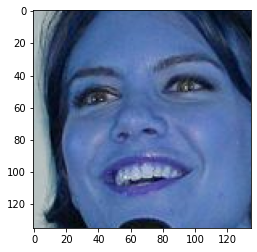

In [33]:
#test_img = '/kaggle/input/14-celebrity-faces-dataset/14-celebrity-faces-dataset/14-celebrity-faces-dataset/data/val/anne_hathaway/Anne_Hathaway_2008-b.jpg'
cropped_test_img = get_cropped_image_if_2_eyes('/kaggle/input/14-celebrity-faces-dataset/14-celebrity-faces-dataset/14-celebrity-faces-dataset/data/val/lauren_cohan/800px-Lauren_Cohan_(5809366971) (1).jpg')
cropped_test_img = np.array(cropped_test_img)
#path='/kaggle/input/14-celebrity-faces-dataset/14-celebrity-faces-dataset/14-celebrity-faces-dataset/data/val/anne_hathaway/Anne_Hathaway_2008-b.jpg'

#print(os.path.isfile(path))

scaled_raw_test_img = cv2.resize(cropped_test_img,(32,32))
test_img_har = w2d(cropped_test_img, 'db1', 5)

#plt.imshow(test_img_har, cmap='gray')
scaled_test_img_har = cv2.resize(test_img_har,(32,32))
combine_test_img = np.vstack((scaled_raw_test_img.reshape(32*32*3,1),scaled_test_img_har.reshape(32*32,1)))
combine_test_img = np.array(combine_test_img).reshape(1,4096).astype(float)
#print(class_dict.items(pipe.predict(combine_test_img)))
plt.imshow(cropped_test_img)

In [34]:
key_list = list(class_dict.keys())
val= int(pipe.predict(combine_test_img))
print(key_list[val])
#print(val)

lauren_cohan


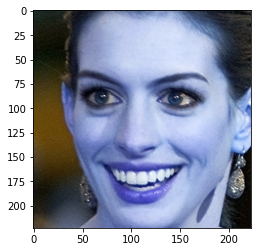

In [35]:
cropped_test_img = get_cropped_image_if_2_eyes('/kaggle/input/14-celebrity-faces-dataset/14-celebrity-faces-dataset/14-celebrity-faces-dataset/data/val/anne_hathaway/Anne_Hathaway_2008-b.jpg')
cropped_test_img = np.array(cropped_test_img)
#path='/kaggle/input/14-celebrity-faces-dataset/14-celebrity-faces-dataset/14-celebrity-faces-dataset/data/val/anne_hathaway/Anne_Hathaway_2008-b.jpg'

#print(os.path.isfile(path))

scaled_raw_test_img = cv2.resize(cropped_test_img,(32,32))
test_img_har = w2d(cropped_test_img, 'db1', 5)

#plt.imshow(test_img_har, cmap='gray')
scaled_test_img_har = cv2.resize(test_img_har,(32,32))
combine_test_img = np.vstack((scaled_raw_test_img.reshape(32*32*3,1),scaled_test_img_har.reshape(32*32,1)))
combine_test_img = np.array(combine_test_img).reshape(1,4096).astype(float)
#print(class_dict.items(pipe.predict(combine_test_img)))
plt.imshow(cropped_test_img)

In [36]:
val= int(pipe.predict(combine_test_img))
print(key_list[val])

anne_hathaway


In [37]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         5
           7       0.00      0.00      0.00         3
           8       1.00      0.33      0.50         3
           9       0.33      1.00      0.50         3
          10       0.50      1.00      0.67         2
          11       0.00      0.00      0.00         3
          12       1.00      1.00      1.00         2

    accuracy                           0.54        24
   macro avg       0.35      0.39      0.33        24
weighted avg       0.50      0.54      0.47        24



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1

In [38]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [39]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [40]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


,model,best_score,best_params
0,svm,0.290476,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.221905,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.277143,{'logisticregression__C': 1}


In [41]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [42]:
best_clf = best_estimators['svm']

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]])

Text(69.0, 0.5, 'Truth')

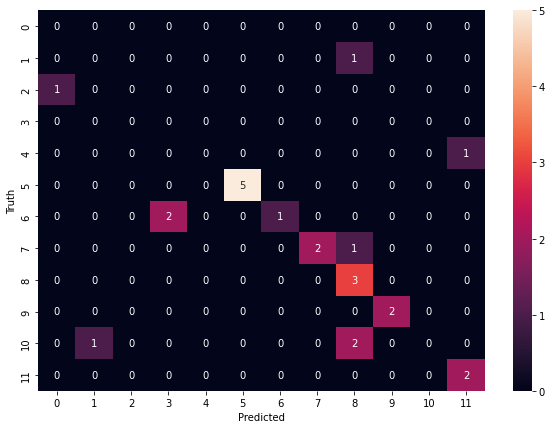

In [44]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [45]:
class_dict

{'arnold_schwarzenegger': 0,
 'ben_afflek': 1,
 'will_smith': 2,
 'lauren_cohan': 3,
 'simon_pegg': 4,
 'keanu_reeves': 5,
 'mindy_kaling': 6,
 'dwayne_johnson': 7,
 'sofia_vergara': 8,
 'jerry_seinfeld': 9,
 'anne_hathaway': 10,
 'kate_beckinsale': 11,
 'madonna': 12,
 'elton_john': 13}

**Saving the model**

In [46]:
!pip install joblib
import joblib 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [47]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))